# TF-IDF Analysis and Zipf/Heaps Law Visualization

This notebook demonstrates:

1. Zipf's Law and Heaps' Law visualization
2. Tokenization and preprocessing
3. TF, IDF, and TF-IDF computation
4. Identifying top terms in a document and corpus


In [1]:
import re
import math
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Sample text (Steve Wozniak speech)
text = """I said life is not about accomplishment; it's about happiness and my formula for happiness.

There's a formula for creating happiness, and it couldn't be more simple. Happiness equals smiles minus frowns.

In life and business, you can't stop things from going wrong, but you do get to decide how to react in those situations.

Make life fun, use your brain, be kind, be a leader, and help people."""


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization and Stopword Removal

We convert text to lowercase, remove stopwords, and only keep alphabetic words longer than 2 characters.


In [2]:
# Custom stopwords (can use NLTK stopwords as well)
stop_words = set([
    'the', 'is', 'at', 'which', 'on', 'for', 'to', 'be', 'with', 'a', 'an', 'and', 'of', 'this', 'from', 
    'i', 'you', 'in', 'it', 'that', 'just', 'your', 'have', 'has', 'as', 'are', 'was', 'were', 'but', 
    'by', 'not', 'or', 'so', 'if'
])  

# Tokenize
tokens = re.findall(r'\b\w+\b', text.lower())
tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

print("Tokenized words:", tokens[:20])


Tokenized words: ['said', 'life', 'about', 'accomplishment', 'about', 'happiness', 'formula', 'happiness', 'there', 'formula', 'creating', 'happiness', 'couldn', 'more', 'simple', 'happiness', 'equals', 'smiles', 'minus', 'frowns']


## Zipf's Law and Heaps' Law

- **Zipf's Law:** Frequency of a word is inversely proportional to its rank.  
- **Heaps' Law:** Vocabulary growth as more tokens are added.


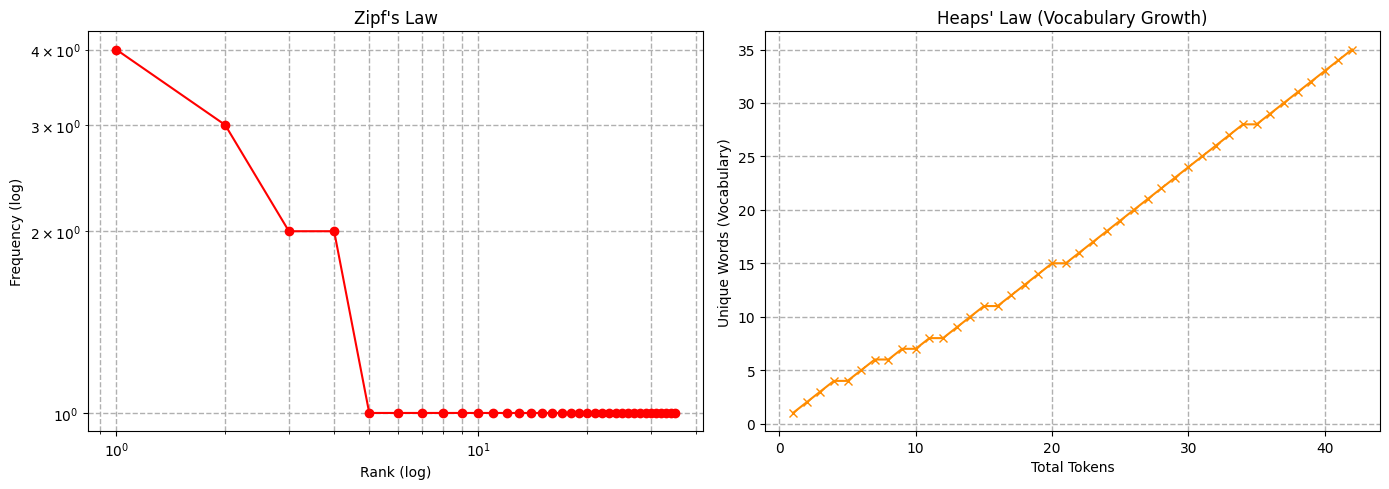

In [3]:
# Zipf's Law
freq = Counter(tokens)
sorted_items = sorted(freq.items(), key=lambda x: x[1], reverse=True)
words, freqs = zip(*sorted_items)
ranks = range(1, len(freqs)+1)

# Heaps' Law
vocab = set()
vocab_size = []
token_counts = []

for i, word in enumerate(tokens, 1):
    vocab.add(word)
    vocab_size.append(len(vocab))
    token_counts.append(i)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14,5))

# Zipf's Law
axs[0].loglog(ranks, freqs, marker='o', color='red')
axs[0].set_title("Zipf's Law")
axs[0].set_xlabel("Rank (log)")
axs[0].set_ylabel("Frequency (log)")
axs[0].grid(True, which='both', linestyle='--', linewidth=1)

# Heaps' Law
axs[1].plot(token_counts, vocab_size, marker='x', color='darkorange')
axs[1].set_title("Heaps' Law (Vocabulary Growth)")
axs[1].set_xlabel("Total Tokens")
axs[1].set_ylabel("Unique Words (Vocabulary)")
axs[1].grid(True, linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


## TF-IDF Computation

- Compute **Term Frequency (TF)** per document
- Compute **Inverse Document Frequency (IDF)**
- Compute **TF-IDF**


In [4]:
# Split into paragraphs
documents = [p.strip() for p in text.split('\n\n') if p.strip()]

# Tokenize each paragraph
def tokenize(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in stop_words and len(t) > 2]

tokenized_docs = [tokenize(doc) for doc in documents]
for doc in tokenized_docs:
    print(doc)


['said', 'life', 'about', 'accomplishment', 'about', 'happiness', 'formula', 'happiness']
['there', 'formula', 'creating', 'happiness', 'couldn', 'more', 'simple', 'happiness', 'equals', 'smiles', 'minus', 'frowns']
['life', 'business', 'can', 'stop', 'things', 'going', 'wrong', 'get', 'decide', 'how', 'react', 'those', 'situations']
['make', 'life', 'fun', 'use', 'brain', 'kind', 'leader', 'help', 'people']


In [5]:
# Term Frequency
def compute_tf(tokens):
    tf_counter = Counter(tokens)
    total_tokens = len(tokens)
    return {term: count/total_tokens for term, count in tf_counter.items()}

tf_docs = [compute_tf(doc) for doc in tokenized_docs]

# Inverse Document Frequency
def compute_idf(tokenized_documents):
    N = len(tokenized_documents)
    all_terms = set(term for doc in tokenized_documents for term in doc)
    idf = {}
    for term in all_terms:
        containing_docs = sum(1 for doc in tokenized_documents if term in doc)
        idf[term] = math.log((N+1)/(containing_docs+1)) + 1
    return idf

idf = compute_idf(tokenized_docs)

# TF-IDF
def compute_tfidf(tf, idf):
    return {term: tf_val * idf.get(term, 0) for term, tf_val in tf.items()}

tfidf_docs = [compute_tfidf(tf_doc, idf) for tf_doc in tf_docs]

# Show TF-IDF of first paragraph
first_doc_tfidf = tfidf_docs[0]
top_terms = sorted(first_doc_tfidf.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top terms in first paragraph:")
for term, score in top_terms:
    print(f"{term}: {score:.4f}")


Top terms in first paragraph:
about: 0.4791
happiness: 0.3777
said: 0.2395
accomplishment: 0.2395
formula: 0.1889
life: 0.1529


In [6]:
all_tokens = [token for doc in tokenized_docs for token in doc]
corpus_tf = compute_tf(all_tokens)
corpus_tfidf = compute_tfidf(corpus_tf, idf)

import pandas as pd

df_corpus = pd.DataFrame({
    'Term': list(corpus_tf.keys()),
    'TF': [round(corpus_tf[t], 4) for t in corpus_tf],
    'IDF': [round(idf[t], 4) for t in corpus_tf],
    'TF-IDF': [round(corpus_tfidf[t], 4) for t in corpus_tf]
}).sort_values(by='TF-IDF', ascending=False)

print("Top terms in the whole corpus:")
print(df_corpus.head(20))


Top terms in the whole corpus:
              Term      TF     IDF  TF-IDF
4        happiness  0.0952  1.5108  0.1439
2            about  0.0476  1.9163  0.0913
1             life  0.0714  1.2231  0.0874
5          formula  0.0476  1.5108  0.0719
0             said  0.0238  1.9163  0.0456
3   accomplishment  0.0238  1.9163  0.0456
6            there  0.0238  1.9163  0.0456
7         creating  0.0238  1.9163  0.0456
8           couldn  0.0238  1.9163  0.0456
9             more  0.0238  1.9163  0.0456
10          simple  0.0238  1.9163  0.0456
11          equals  0.0238  1.9163  0.0456
12          smiles  0.0238  1.9163  0.0456
13           minus  0.0238  1.9163  0.0456
14          frowns  0.0238  1.9163  0.0456
15        business  0.0238  1.9163  0.0456
16             can  0.0238  1.9163  0.0456
17            stop  0.0238  1.9163  0.0456
18          things  0.0238  1.9163  0.0456
19           going  0.0238  1.9163  0.0456
